# **Fashion MNIST**

In [32]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [33]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [34]:
print(f"Training sample:\n{train_data[0]}\n") 
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [35]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [36]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

In [37]:
import matplotlib.pyplot as plt

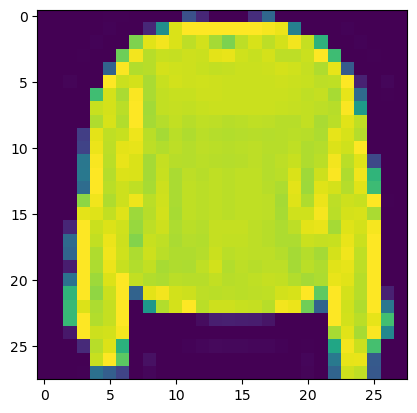

In [38]:
plt.imshow(train_data[7])

In [39]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

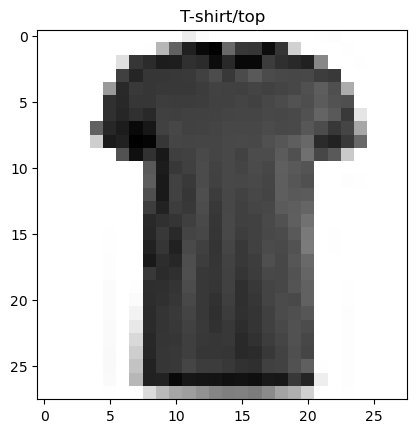

In [40]:
plt.imshow(train_data[17], cmap=plt.cm.binary) 
plt.title(class_names[train_labels[17]]);

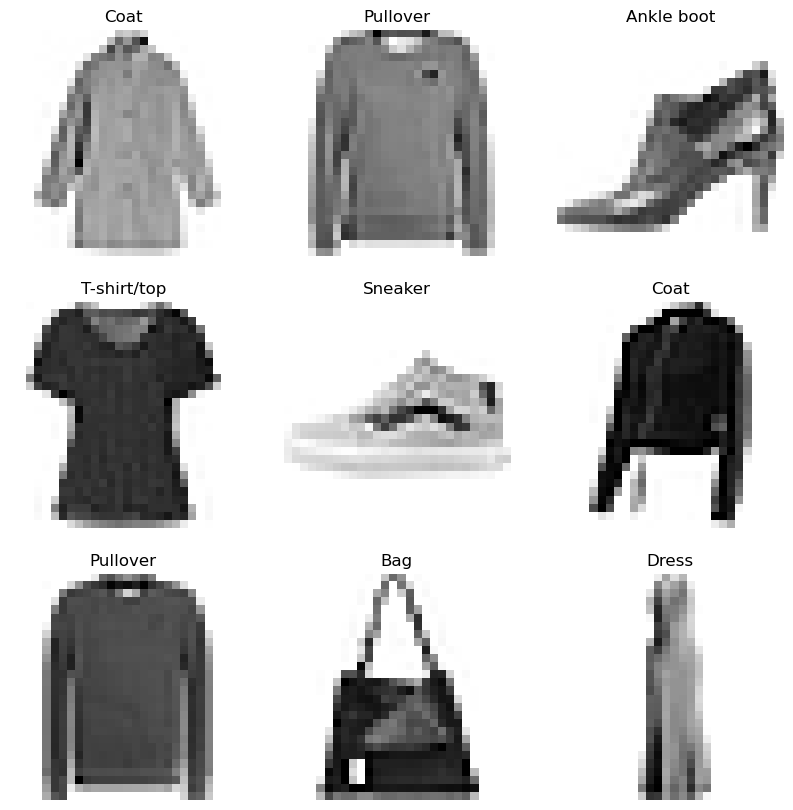

In [41]:
import random

plt.figure(figsize=(10,10))
for i in range(9):
    ax = plt.subplot(3,3, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap="binary")
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

In [42]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) 

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2335 - accuracy: 0.1578 - val_loss: 2.0139 - val_accuracy: 0.1948
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.7989 - accuracy: 0.2352 - val_loss: 1.7423 - val_accuracy: 0.2495
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.7028 - accuracy: 0.2653 - val_loss: 1.6719 - val_accuracy: 0.2705
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6682 - accuracy: 0.2816 - val_loss: 1.6600 - val_accuracy: 0.2998
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6464 - accuracy: 0.2931 - val_loss: 1.6370 - val_accuracy: 0.2985
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6312 - accuracy: 0.2987 - val_loss: 1.6224 - val_accuracy: 0.3140
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6223 - accuracy: 0.3043 - val_loss: 1.6218 - val_accuracy:

In [43]:
model_11.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 4)                 3140      
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [44]:
train_data.min(), train_data.max()

(0, 255)

In [45]:
train_data = train_data / 255.0
test_data = test_data / 255.0

In [46]:
train_data.min(), train_data.max()

(0.0, 1.0)

In [47]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

norm_history = model_12.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) 

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.9859 - accuracy: 0.6344 - val_loss: 0.7576 - val_accuracy: 0.7370
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6877 - accuracy: 0.7662 - val_loss: 0.6866 - val_accuracy: 0.7707
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6286 - accuracy: 0.7896 - val_loss: 0.6461 - val_accuracy: 0.7859
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5988 - accuracy: 0.8009 - val_loss: 0.6308 - val_accuracy: 0.7903
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5821 - accuracy: 0.8060 - val_loss: 0.6056 - val_accuracy: 0.8000
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5679 - accuracy: 0.8104 - val_loss: 0.6277 - val_accuracy: 0.7912
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5568 - accuracy: 0.8151 - val_loss: 0.6280 - val_accuracy:

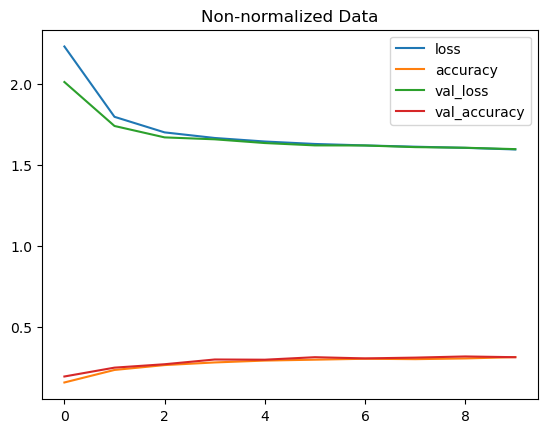

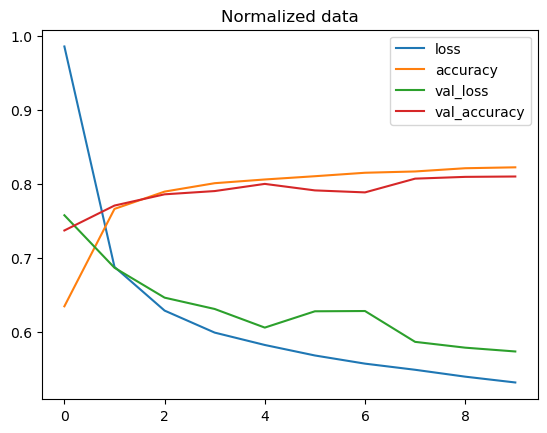

In [48]:
import pandas as pd

pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")

pd.DataFrame(norm_history.history).plot(title="Normalized data");

In [49]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

norm_history = model_12.fit(train_data,
                                train_labels,
                                epochs=40,
                                validation_data=(test_data, test_labels),
                                callbacks=[lr_scheduler]) 

Epoch 1/40
1875/1875 [==============================] - 3s 1ms/step - loss: 1.3261 - accuracy: 0.4569 - val_loss: 0.9178 - val_accuracy: 0.6740 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7500 - accuracy: 0.7341 - val_loss: 0.7166 - val_accuracy: 0.7446 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6701 - accuracy: 0.7538 - val_loss: 0.6939 - val_accuracy: 0.7536 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6502 - accuracy: 0.7605 - val_loss: 0.6870 - val_accuracy: 0.7555 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6385 - accuracy: 0.7638 - val_loss: 0.6626 - val_accuracy: 0.7618 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6298 - accuracy: 0.7688 - val_loss: 0.6711 - val_accuracy: 0.7642 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 2s

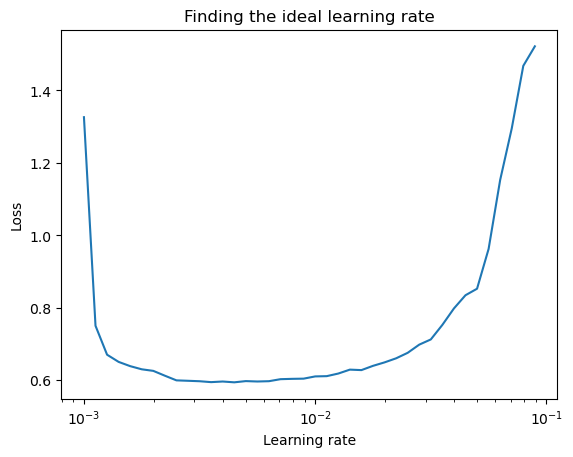

In [50]:
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, norm_history.history["loss"]) 
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [51]:
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.003), 
                 metrics=["accuracy"])

history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20


c:\Users\mbatu\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1875/1875 [==============================] - 4s 2ms/step - loss: 0.9310 - accuracy: 0.6674 - val_loss: 0.7055 - val_accuracy: 0.7511
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6632 - accuracy: 0.7647 - val_loss: 0.6820 - val_accuracy: 0.7617
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6295 - accuracy: 0.7752 - val_loss: 0.6734 - val_accuracy: 0.7421
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6143 - accuracy: 0.7784 - val_loss: 0.6431 - val_accuracy: 0.7638
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6078 - accuracy: 0.7809 - val_loss: 0.6341 - val_accuracy: 0.7757
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6007 - accuracy: 0.7836 - val_loss: 0.6787 - val_accuracy: 0.7697
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5966 - accuracy: 0.7868 - val_loss: 0.6357 - val_accuracy: 0.7748
Epo

In [52]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [53]:
y_probs = model_14.predict(test_data) 

y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[1.2351369e-11, 5.9497256e-06, 5.6190049e-07, 1.3371640e-10,
        3.1386506e-08, 5.1348209e-01, 9.6703701e-10, 2.5316317e-02,
        5.1258347e-04, 4.6068245e-01],
       [2.0999478e-05, 4.8561058e-11, 8.9745849e-01, 3.2032041e-09,
        1.8689685e-02, 8.2322121e-16, 3.2462869e-02, 0.0000000e+00,
        5.1367931e-02, 5.3110217e-31],
       [4.3075893e-08, 9.9221230e-01, 1.5127790e-05, 2.1947641e-04,
        1.1119352e-03, 1.0453712e-05, 3.9767101e-06, 1.7050994e-10,
        3.5027135e-08, 6.4266603e-03],
       [3.1581027e-09, 9.9932241e-01, 2.2288984e-07, 2.8892202e-04,
        3.6781706e-04, 9.2946478e-10, 3.8401740e-07, 1.2308533e-15,
        2.7583116e-12, 2.0211050e-05],
       [8.9815795e-02, 4.6418230e-05, 3.2492983e-01, 8.0935536e-03,
        7.6456681e-02, 1.3323297e-08, 4.9553525e-01, 1.2171060e-25,
        5.1224814e-03, 9.8329970e-17]], dtype=float32)

In [54]:
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(5, 'Sandal')

In [55]:
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([5, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[757,   4,  17,  84,   6,   8, 102,   0,  22,   0],
       [  1, 949,  10,  27,   8,   2,   0,   0,   2,   1],
       [ 13,   3, 676,  12, 184,   1,  66,   0,  45,   0],
       [ 47,  27,  20, 787,  47,  12,  55,   0,   5,   0],
       [  1,   6, 143,  18, 773,   0,  52,   0,   7,   0],
       [  0,   0,   0,   0,   0, 901,   0,  43,  10,  46],
       [181,   4, 165,  66, 179,   6, 364,   0,  35,   0],
       [  0,   0,   0,   0,   0,  52,   0, 906,   0,  42],
       [ 23,   1,  14,   5,   1,  24,   8,   4, 920,   0],
       [  1,   0,   0,   0,   0,  44,   0,  45,   0, 910]], dtype=int64)

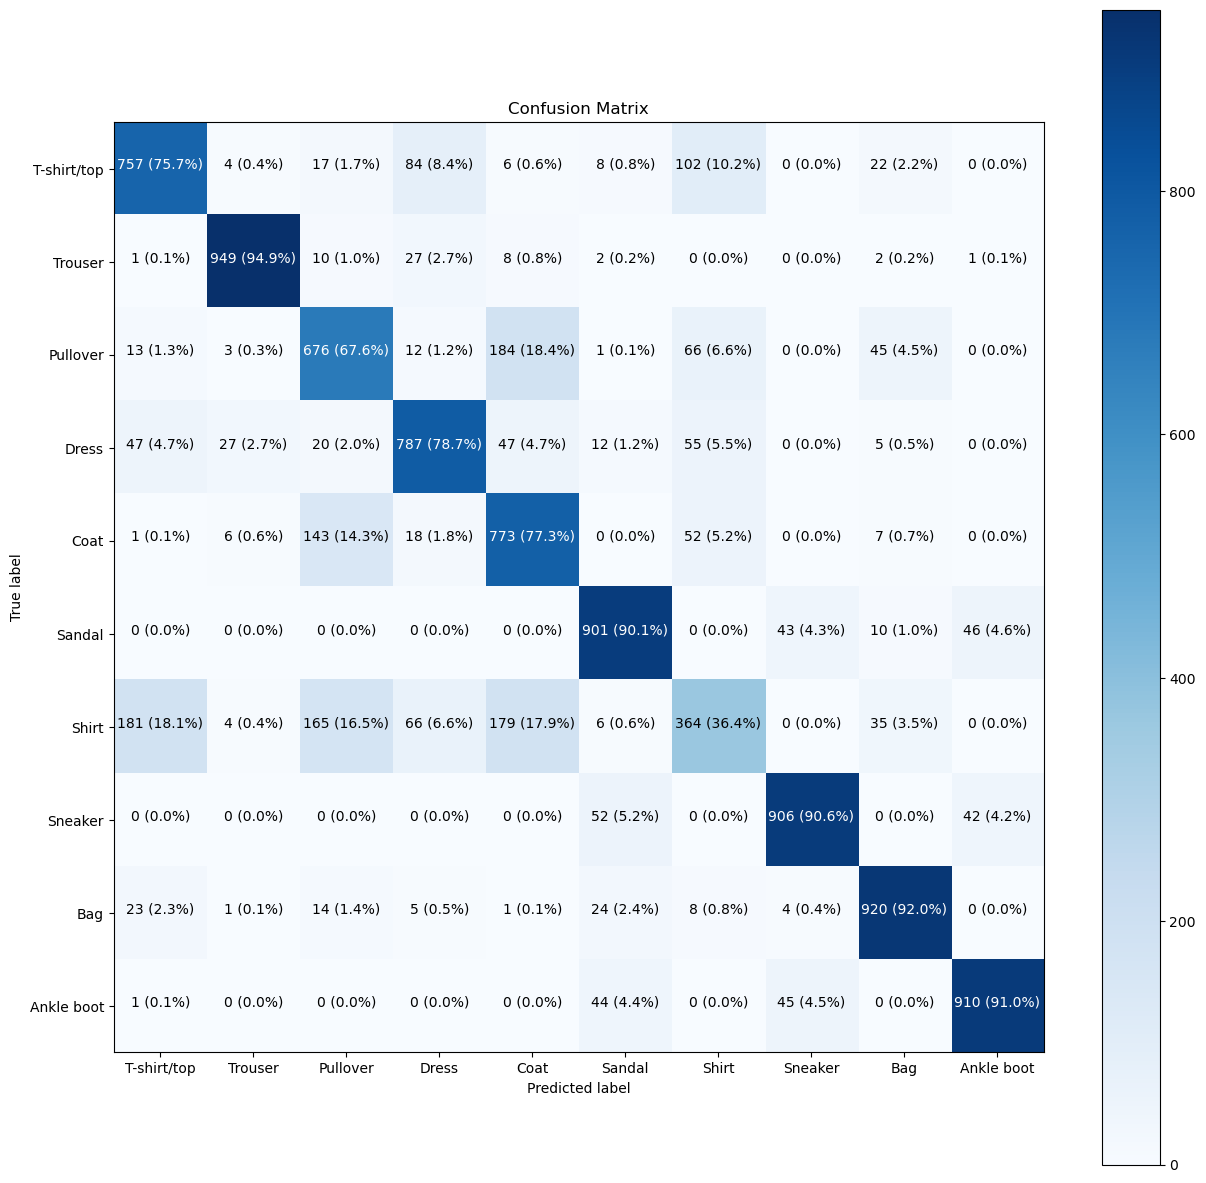

In [57]:
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [124]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "blue"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 43ms/step


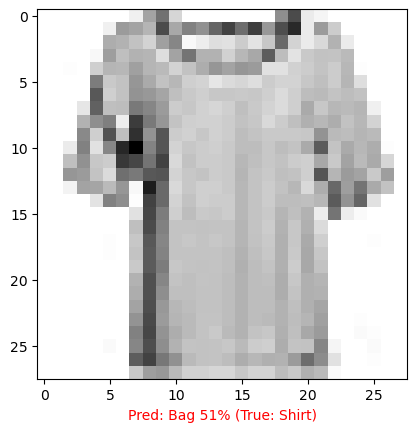

In [125]:
plot_random_image(model=model_14, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)